## 신경망 모델에서 옵티마이저 사용법
#### - 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

#### 1.Adam optimizer

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
# Adam 클래스의 하이퍼 파라메터
from tensorflow.keras.optimizers import Adam
adam = Adam(
    learning_rate=0.001,        #학습률
    beta_1=0.9,                 # beta => 0~1사이의 값.. 설명어려움
    beta_2=0.999,                 
    epsilon=1e-07,               # None 이면 K.epsilon(), fuzz factor
    weight_decay=None,           # 업데이트마다 적용되는 학습률의 감소율(학습률을 감소시킬때마다 씀)
    amsgrad=False               # Adam의 변형인 AMSGrad의 적용 여부
)

In [12]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=0)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.9561


[0.55146723985672, 0.9561403393745422]

https://keras.io/api/optimizers/adam/

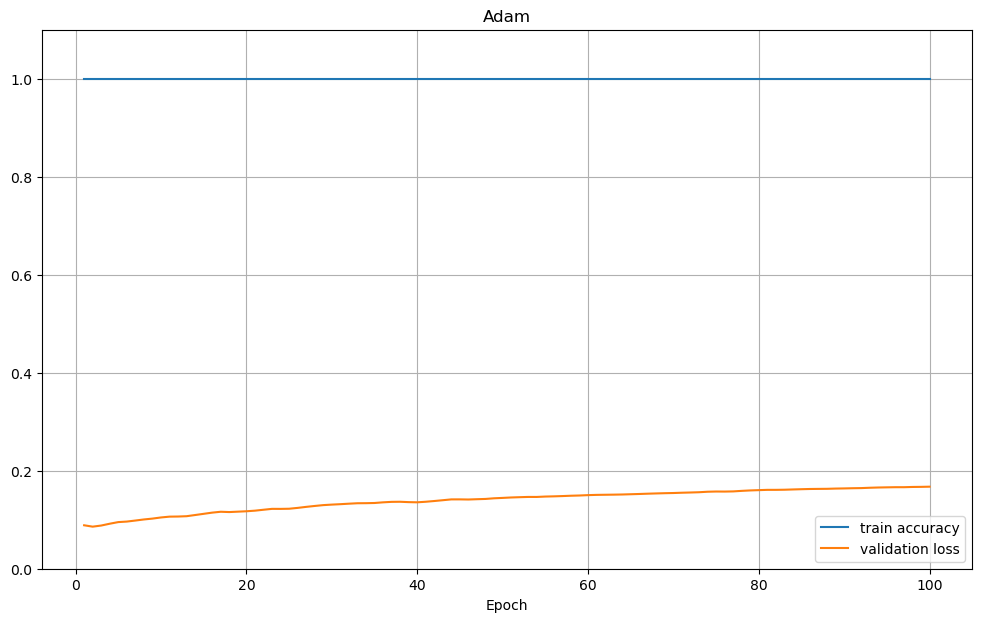

In [14]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,7))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1]), plt.xlabel('Epoch')
plt.title('Adam')
plt.show()

#### 2.RMSProp optimizer

In [16]:
model2 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [18]:
from tensorflow.keras.optimizers import RMSprop

rmsp = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    epsilon=1e-7,
    weight_decay=None
)